<a href="https://colab.research.google.com/github/yejin0455/sesac-DL/blob/main/D18_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%run my_init.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tf.__version__: 2.8.0
keras.__version__: 2.8.0


In [3]:
%matplotlib inline

In [4]:
from keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17473536/17464789 [==============================] - 0s 0us/step


In [5]:
train_input.shape, test_input.shape

((25000,), (25000,))

In [6]:
len(train_input[0])

218

In [7]:
len(train_input[1])

189

In [8]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [9]:
train_target[:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [10]:
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [11]:
train_input.shape

(20000,)

In [12]:
lengths = [len(x) for x in train_input]
lengths[:10]

[259, 520, 290, 109, 559, 96, 130, 935, 383, 716]

In [13]:
np.mean(lengths), np.median(lengths)

(239.00925, 178.0)

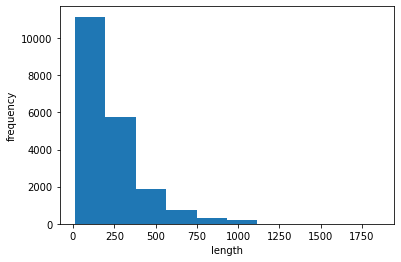

In [14]:
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()  

In [15]:
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [16]:
train_seq.shape

(20000, 100)

In [17]:
train_seq[0]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158], dtype=int32)

In [18]:
train_seq[5]

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2, 352,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
       269,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14, 238,  56, 129,   2,  10,  10,  21,   2,
        94, 364, 352,   2,   2,  11, 190,  24, 484,   2,   7,  94, 205,
       405,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2, 290,   2,  46,  48,  64,  18,   4,   2], dtype=int32)

In [19]:
val_seq = pad_sequences(val_input, maxlen=100)
val_seq.shape

(5000, 100)

In [20]:
train_oh = keras.utils.to_categorical(train_seq)
train_oh.shape

(20000, 100, 500)

In [21]:
train_oh[0, 0, :12]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [22]:
train_oh[0, 1, :12]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
train_oh[0, 99, :12]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
val_oh = keras.utils.to_categorical(val_seq)
val_oh.shape

(5000, 100, 500)

In [25]:
#model = keras.Sequential()

#model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
#model.add(keras.layers.Dense(1, activation='sigmoid'))

In [26]:
#model.summary()

In [27]:
#rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

In [28]:
#model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
#              metrics=['accuracy'])

In [29]:
#checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
#early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
#                                                  restore_best_weights=True)

In [30]:
#history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
#                    validation_data=(val_oh, val_target),
#                    callbacks=[checkpoint_cb, early_stopping_cb])

In [31]:
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.xlabel('epoch')
#plt.ylabel('loss')
#plt.legend(['train', 'val'])
#plt.show()

In [32]:
model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, dropout=0.3, return_sequences=True, input_shape=(100, 500), name="rnn_1"))
model.add(keras.layers.SimpleRNN(8, dropout=0.3, name='rnn_2'))
model.add(keras.layers.Dense(1, activation='sigmoid', name='output'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnn_1 (SimpleRNN)           (None, 100, 8)            4072      
                                                                 
 rnn_2 (SimpleRNN)           (None, 8)                 136       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 4,217
Trainable params: 4,217
Non-trainable params: 0
_________________________________________________________________


In [34]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

In [35]:
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

In [36]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn2-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

In [37]:
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 33s 99ms/step - loss: 0.7231 - accuracy: 0.5037 - val_loss: 0.6992 - val_accuracy: 0.5226
Epoch 2/100
313/313 [==============================] - 33s 106ms/step - loss: 0.7143 - accuracy: 0.5030 - val_loss: 0.6948 - val_accuracy: 0.5244
Epoch 3/100
313/313 [==============================] - 30s 97ms/step - loss: 0.7045 - accuracy: 0.5175 - val_loss: 0.6879 - val_accuracy: 0.5464
Epoch 4/100
313/313 [==============================] - 31s 98ms/step - loss: 0.6928 - accuracy: 0.5429 - val_loss: 0.6830 - val_accuracy: 0.5704
Epoch 5/100
313/313 [==============================] - 31s 97ms/step - loss: 0.6825 - accuracy: 0.5756 - val_loss: 0.6726 - val_accuracy: 0.5954
Epoch 6/100
313/313 [==============================] - 30s 97ms/step - loss: 0.6698 - accuracy: 0.6059 - val_loss: 0.6560 - val_accuracy: 0.6268
Epoch 7/100
313/313 [==============================] - 31s 98ms/step - loss: 0.6512 - accuracy: 0.6378 - val_loss: 0.6374 - val_a

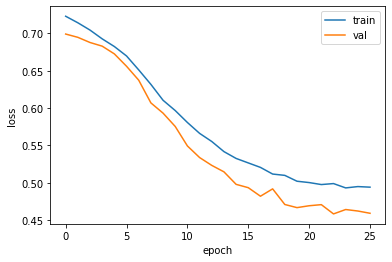

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [48]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8, dropout=0.3, return_sequences=True, name="rnn_1"))
model2.add(keras.layers.SimpleRNN(8, dropout=0.3, name='rnn_2'))
model2.add(keras.layers.Dense(1, activation='sigmoid', name='output'))

In [49]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 rnn_1 (SimpleRNN)           (None, 100, 8)            200       
                                                                 
 rnn_2 (SimpleRNN)           (None, 8)                 136       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 8,345
Trainable params: 8,345
Non-trainable params: 0
_________________________________________________________________


In [50]:
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

In [53]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.tf')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

In [54]:
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - ETA: 0s - loss: 0.6265 - accuracy: 0.6562INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


313/313 [==============================] - 78s 251ms/step - loss: 0.6265 - accuracy: 0.6562 - val_loss: 0.5710 - val_accuracy: 0.7208
Epoch 2/100
312/313 [============================>.] - ETA: 0s - loss: 0.5700 - accuracy: 0.7178INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


313/313 [==============================] - 19s 60ms/step - loss: 0.5699 - accuracy: 0.7178 - val_loss: 0.5336 - val_accuracy: 0.7480
Epoch 3/100
312/313 [============================>.] - ETA: 0s - loss: 0.5401 - accuracy: 0.7437INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


313/313 [==============================] - 18s 59ms/step - loss: 0.5400 - accuracy: 0.7438 - val_loss: 0.5110 - val_accuracy: 0.7612
Epoch 4/100
312/313 [============================>.] - ETA: 0s - loss: 0.5215 - accuracy: 0.7566INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


313/313 [==============================] - 19s 61ms/step - loss: 0.5213 - accuracy: 0.7567 - val_loss: 0.4915 - val_accuracy: 0.7762
Epoch 5/100
313/313 [==============================] - ETA: 0s - loss: 0.5044 - accuracy: 0.7681INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


313/313 [==============================] - 18s 58ms/step - loss: 0.5044 - accuracy: 0.7681 - val_loss: 0.4815 - val_accuracy: 0.7832
Epoch 6/100
313/313 [==============================] - ETA: 0s - loss: 0.4946 - accuracy: 0.7723INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


313/313 [==============================] - 19s 59ms/step - loss: 0.4946 - accuracy: 0.7723 - val_loss: 0.4702 - val_accuracy: 0.7894
Epoch 7/100
313/313 [==============================] - ETA: 0s - loss: 0.4839 - accuracy: 0.7783INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


313/313 [==============================] - 19s 61ms/step - loss: 0.4839 - accuracy: 0.7783 - val_loss: 0.4669 - val_accuracy: 0.7862
Epoch 8/100
312/313 [============================>.] - ETA: 0s - loss: 0.4795 - accuracy: 0.7789INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


313/313 [==============================] - 18s 58ms/step - loss: 0.4794 - accuracy: 0.7789 - val_loss: 0.4706 - val_accuracy: 0.7846
Epoch 9/100
312/313 [============================>.] - ETA: 0s - loss: 0.4712 - accuracy: 0.7853INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


313/313 [==============================] - 19s 61ms/step - loss: 0.4713 - accuracy: 0.7853 - val_loss: 0.4665 - val_accuracy: 0.7858
Epoch 10/100
313/313 [==============================] - ETA: 0s - loss: 0.4651 - accuracy: 0.7899INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


313/313 [==============================] - 18s 59ms/step - loss: 0.4651 - accuracy: 0.7899 - val_loss: 0.4562 - val_accuracy: 0.7922
Epoch 11/100
313/313 [==============================] - ETA: 0s - loss: 0.4631 - accuracy: 0.7896INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


313/313 [==============================] - 18s 59ms/step - loss: 0.4631 - accuracy: 0.7896 - val_loss: 0.4539 - val_accuracy: 0.7950
Epoch 12/100
313/313 [==============================] - ETA: 0s - loss: 0.4604 - accuracy: 0.7903INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


313/313 [==============================] - 20s 63ms/step - loss: 0.4604 - accuracy: 0.7903 - val_loss: 0.4534 - val_accuracy: 0.7942
Epoch 13/100
313/313 [==============================] - ETA: 0s - loss: 0.4555 - accuracy: 0.7933INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


313/313 [==============================] - 19s 61ms/step - loss: 0.4555 - accuracy: 0.7933 - val_loss: 0.4515 - val_accuracy: 0.7950
Epoch 14/100
312/313 [============================>.] - ETA: 0s - loss: 0.4535 - accuracy: 0.7951INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


313/313 [==============================] - 19s 60ms/step - loss: 0.4536 - accuracy: 0.7950 - val_loss: 0.4515 - val_accuracy: 0.7968
Epoch 15/100
312/313 [============================>.] - ETA: 0s - loss: 0.4501 - accuracy: 0.7947INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


313/313 [==============================] - 19s 62ms/step - loss: 0.4502 - accuracy: 0.7946 - val_loss: 0.4468 - val_accuracy: 0.7940
Epoch 16/100
312/313 [============================>.] - ETA: 0s - loss: 0.4492 - accuracy: 0.7975INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


313/313 [==============================] - 19s 61ms/step - loss: 0.4490 - accuracy: 0.7976 - val_loss: 0.4482 - val_accuracy: 0.7972
Epoch 17/100
312/313 [============================>.] - ETA: 0s - loss: 0.4453 - accuracy: 0.7970INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


313/313 [==============================] - 20s 63ms/step - loss: 0.4451 - accuracy: 0.7970 - val_loss: 0.4536 - val_accuracy: 0.7960
Epoch 18/100
312/313 [============================>.] - ETA: 0s - loss: 0.4441 - accuracy: 0.7980INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


INFO:tensorflow:Assets written to: best-embedding-model.tf/assets


313/313 [==============================] - 19s 61ms/step - loss: 0.4441 - accuracy: 0.7979 - val_loss: 0.4509 - val_accuracy: 0.7934


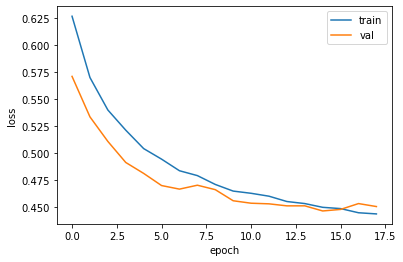

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()